### Processing the data from torchxrayvision format and saving it as grayscale in Train and Validation folder

In [1]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import imageio

In [2]:
d = xrv.datasets.COVID19_Dataset(imgpath="covid-chestxray-dataset/images/", csvpath="covid-chestxray-dataset/metadata.csv")

In [3]:
labels = pd.DataFrame(
    data=d.labels,
    columns=d.pathologies
            )

In [4]:
label_covid = labels[['COVID-19']]


In [8]:
labels

,Aspergillosis,Aspiration,Bacterial,COVID-19,Chlamydophila,Fungal,H1N1,Herpes,Influenza,Klebsiella,...,No Finding,Nocardia,Pneumocystis,Pneumonia,SARS,Staphylococcus,Streptococcus,Tuberculosis,Varicella,Viral
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


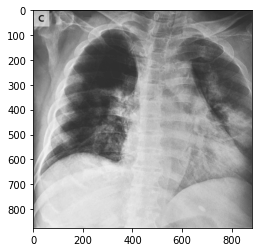

In [30]:
plt.imshow(d[2]['img'][0], cmap='gray')

In [31]:
#Saving all the images in an array
images = []

for _ in range(len(d)):
    images.append(d[_]['img'][0])

In [32]:
#Separating X-rays of patients having covid and not having covid

list_covid_yes = []
list_covid_no = []
image_covid_yes = []
image_covid_no = []

for label in range(len(label_covid)):
    if(label_covid.iloc[label][0]==1.0):
        list_covid_yes.append(label_covid.iloc[label][0])
        image_covid_yes.append(images[label])
        
    else:
        list_covid_no.append(label_covid.iloc[label][0])
        image_covid_no.append(images[label])

In [7]:
#Converting to numpy array
image_covid_yes = np.array(image_covid_yes)
image_covid_no = np.array(image_covid_no)

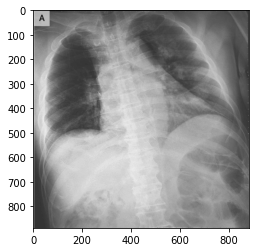

In [33]:
plt.imshow(image_covid_yes[0], cmap='gray')

In [40]:
len(image_covid_yes), len(image_covid_no)

(342, 193)

In [62]:
count = 0

for i in range(len(image_covid_yes)):
    if i < int(len(image_covid_yes)*0.7):
        imageio.imwrite('./Train/COVID/'+str(count)+'.png', image_covid_yes[i])
    else:
        imageio.imwrite('./Validation/COVID/'+str(count)+'.png', image_covid_yes[i])  
    count+=1
    
count = 0

for i in range(len(image_covid_no)):
    if i < int(len(image_covid_no)*0.7):
        imageio.imwrite('./Train/Non-COVID/'+str(count)+'.png', image_covid_no[i])
    else:
        imageio.imwrite('./Validation/Non-COVID/'+str(count)+'.png', image_covid_no[i])  
    count+=1

Lossy conversion from float32 to uint8. Range [-895.498046875, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-815.184326171875, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-839.2784423828125, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-847.309814453125, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-550.1490478515625, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-534.0863037109375, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-807.1529541015625, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion fr

Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 991.87451171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 702.7451171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert 

Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 pr

Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 815.184326171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 991.87451171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 758.9647216796875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 935.6549072265625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1

Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 pr

Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 855.3411865234375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1015.9686279296875, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Co

Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 983.8431396484375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image 

Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 903.5294189453125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image 

Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 630.4627685546875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 758.9647216796875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 750.933349609375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1015.9686279296875, 807.1529541015625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 1024.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1024.0, 887.4666748046875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from fl